# Resumen
# Football Player Stats (Premier League 2021-2022)
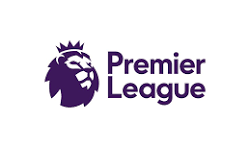



A continuación se presenta un analisis realizado a los datos estadísticos de los jugadores de futbol masculino que participaron de la Premier League (Liga de futbol ingles) en la temporada 2021-2022.


**Variables del dataset**:

* Player : Player's name
* Team : Played club in 2021-2020
* Nation : Player's nation
* Pos : Position
* Age : Player's age
* MP : Matches played
* Starts : Matches started
* Min : Minutes played
* 90s : Minutes played divided by 90
* Gls : Goals scored or allowed
* Ast : Assists
* G-PK : Non Penalty Goals
* PK : Penalty Kicks made
* PKatt : Penalty Kicks attended
* CrdY : Yellow Cards
* CrdR : Red Cards
* Gls : Goals scored per 90 mins
* Ast : Assits per 90 mins
* G+A : Goals and Assists per 90 mins
* G-PK : Goals minus Penalty Kicks made per 90 mins
* G+A-PK: Goals plus Assists minus Penalty Kicks made per 90 mins
* xG : Expected Golas
* npxG : Non-Penalty Expected Goals
* xA : Expected Assits
* npxG+xA : Non-Penalty Expected Goals plus Expected Assists
* xG : Expected Golas per 90 mins
* npxG : Non-Penalty Expected Goals made per 90 mins
* xA : Expected Assits made per 90 mins
* npxG+xA : Non-Penalty Expected Goals plus Expected Assists made per 90 mins

Es importante remarcar que los siguientes estudios, nos dieron la información que aquellos jugadores que pertenecen a los denominados big six, son los jugadores que presentan un mayor rendimiento en cuanto a números

# Objetivo
Lo que se desea resolver con el siguiente análisis es determinar cuales son los jugadores que tienen más calidad o influencia en el juego de sus equipos, ya sea por goles,asistencias, minutos jugados, entre otras métricas.


# Contexto Comercial
Este analisis resulta beneficioso para los distintos equipos con conforman la English Premier League, ya que puede ayudar a determinar que jugadores son más y menos influyentes en sus equipos

# Hipótesis
1.   Los jugadores con más goles suelen ser de los equipos grandes o llamados "big six" (Chelsea, Manchester City, Arsenal, Manchester United, Liverpool and Tottenham Hotspur)
2.   Los equipos más goleadores suelen ser los "big six"
1.   La mayoría de los jugadores de la Premier League son jovenes (entre 20 y 30 años)
2.  Existe una correlación entre la cantidad de partidos que un jugador juega desde el inicio y cuántos de esos partidos juega la totalidad de los 90 minutos
1.   Los datos pueden ser agrupados en diferentes clusteres basados en similitudes en los atributos, lo que revelará patrones ocultos
2.   Un modelo de aprendizaje automático será capaz de clasificar con precisión las instancias en diferentes categorías basadas en los siguientes atributos: Age, MP, Starts, Min, Gls, Ast



# Análisis Exploratorio de Datos (EDA)


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive


file_path = '/content/Football Players Stats (Premier League 2021-2022).csv'
df = pd.read_csv(file_path, encoding='latin-1')

df

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(691, 30)

In [5]:
df.tail()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,James Storer,Wolverhampton Wanderers,NaN,GK,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Player', 'Team', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s',
       'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA', 'npxG+xA', 'xG.1',
       'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1'],
      dtype='object')

In [7]:
df.ndim

2

In [8]:
df.size

20730

In [9]:
coef_var = (df["Age"].std() / df['Age'].mean() *100).round(1)
coef_var

20.0

In [10]:
cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100)})
cardinalidad

,Cantidad,Porcentaje
Player,678,98.118669
Team,20,2.894356
Nation,66,9.551375
Pos,10,1.447178
Age,25,3.617945
MP,39,5.643994
Starts,39,5.643994
Min,478,69.175109
90s,265,38.350217
Gls,20,2.894356


**Valores Perdidos**

Se pueden identificar valores perdidos en las siguientes columnas:


*   Nation
*   Age

El resto de lo que se puede observar como valores perdidos, son a causa de que hay cierta cantidad de jugadores los cuales tienen 0 partidos como titulares y 0 minutos jugados durante todo el torneo, lo que significa que no aportaron datos estadísticos de juego.

En total son 145 los jugadores que presentan esta situación.



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     691 non-null    object 
 1   Team       691 non-null    object 
 2   Nation     688 non-null    object 
 3   Pos        691 non-null    object 
 4   Age        687 non-null    float64
 5   MP         691 non-null    int64  
 6   Starts     691 non-null    int64  
 7   Min        546 non-null    object 
 8   90s        547 non-null    float64
 9   Gls        547 non-null    float64
 10  Ast        547 non-null    float64
 11  G-PK       547 non-null    float64
 12  PK         547 non-null    float64
 13  PKatt      547 non-null    float64
 14  CrdY       547 non-null    float64
 15  CrdR       547 non-null    float64
 16  Gls.1      546 non-null    float64
 17  Ast.1      546 non-null    float64
 18  G+A        546 non-null    float64
 19  G-PK.1     546 non-null    float64
 20  G+A-PK    

In [12]:
jugadores_sin_jugar = df[(df['Starts'] == 0) & (pd.isna(df['Min']))]
jugadores_sin_jugar['Player'].count()

145

In [13]:
jugadores_sin_jugar

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
27,Ryan Alebiousu,Arsenal,eng ENG,DF,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Zach Awe,Arsenal,eng ENG,DF,17.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Miguel Azeez,Arsenal,eng ENG,MF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Héctor Bellerín,Arsenal,es ESP,"DF,MF",26.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Mika Biereth,Arsenal,dk DEN,FW,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Conclusión del EDA
Se puede determinar que el dataset tiene 691 filas y 30 columnas, las cuales presenta varios valores pérdidos, relacionados a aquellos jugadores que no presentaron minutos durante toda la competencia, y a causa de eso, no generaron datos estadísticos.

Los datos que parecen de mayor útilidad parecen ser: Age, MP, Starts, Min, 90s, Gls y Ast

**Hipótesis 1:**
El siguiente analisis nos ayuda a validar la siguiente hipótesis, ya que como se puede observar, se tomó una porción del dataframe de aquellos jugadores que anotaron más de 15 goles durante todo el torneo.

Como se puede observar en el grafico de barras, son 5 los jugadores más goleadores, de los cuales pertenecen a 3 distintos clubes

In [14]:
high_scorers = df[df['Gls']>15]

Text(0, 0.5, 'Goles')

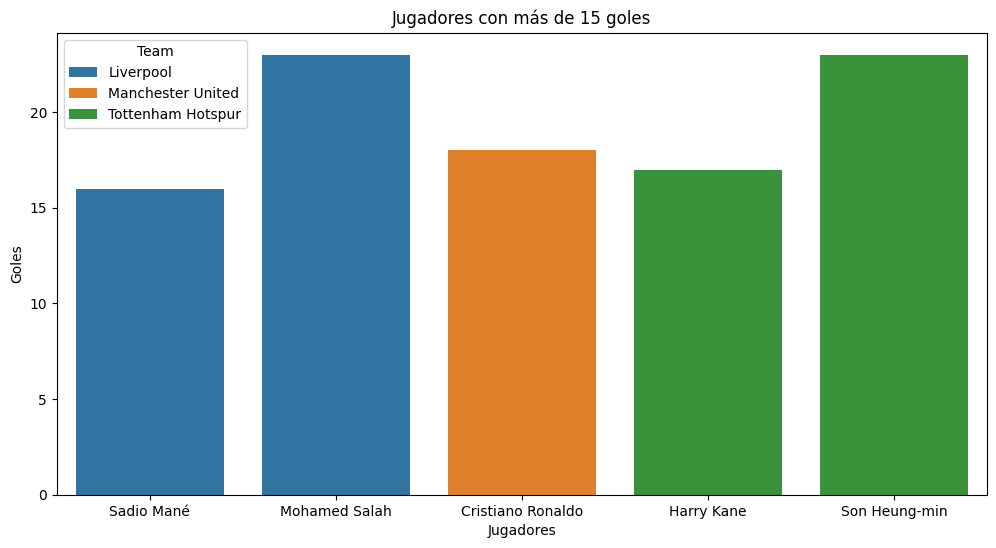

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(y=high_scorers['Gls'],x=high_scorers['Player'], hue=high_scorers['Team'])
plt.title('Jugadores con más de 15 goles')
plt.xlabel('Jugadores')
plt.ylabel('Goles')

**Hipótesis 2:**
El siguiente analisis nos ayuda a validar la segunda hiótesis, ya que como se puede observar, se tomó una porción del dataframe de aquellos equipos que anotaron más de 60 goles durante todo el torneo.

Como se puede observar en el grafico de barras, son 5 los equipos más goleadores

In [16]:
high_scorers_teams = df.groupby('Team')['Gls'].sum().reset_index()
high_scorers_teams = high_scorers_teams[high_scorers_teams['Gls']>60]

In [17]:
teams_goals = high_scorers_teams.sort_values('Gls',ascending=False)

Text(0.5, 0, 'Equipos que anotaron más de 60 goles')

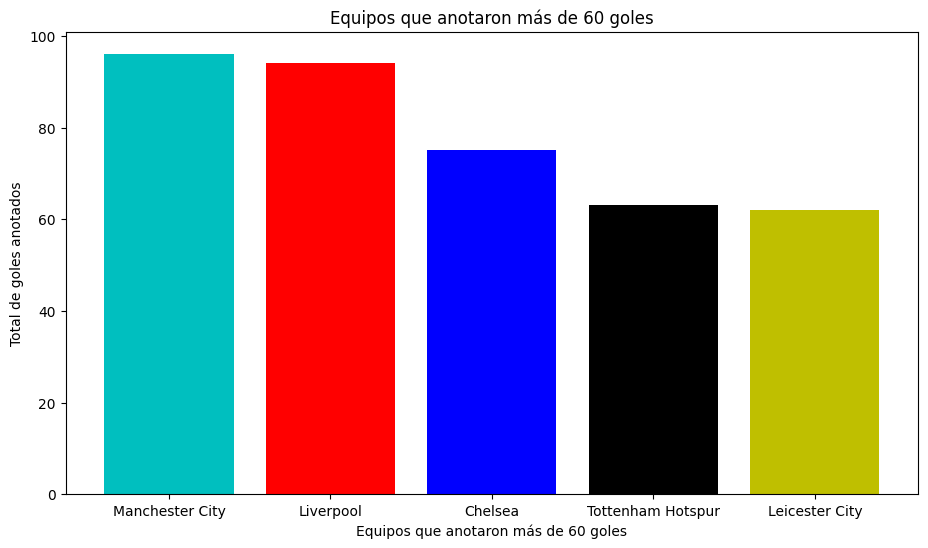

In [18]:
fig, ax = plt.subplots(figsize=(11,6))
# Lista de colores, un color por mes
colores = ['c', 'r', 'b', 'k', 'y']
ax.bar(teams_goals['Team'], teams_goals['Gls'], color=colores)
ax.set_title('Equipos que anotaron más de 60 goles')
ax.set_ylabel('Total de goles anotados')
ax.set_xlabel('Equipos que anotaron más de 60 goles')

**Hipótesis 3:**
El siguiente analisis nos ayuda validar la tercera hipótesis

Básicamente con un df.describe() se puede observar que no hay mucha diferencia entre la media(24,5) y la mediada(24) de la edad, por lo cuál, luego de haber realizado un calculo para determinar la variable coeficiente(20), se puede decir que hace sentido utilizar la media para este caso.

En el siguiente grafico de boxplot se puede observar un poco más en detalle el tema de las edades:

*   min: 15
*   P25: 20
*   P50(Mediana): 24
*   P75: 28
*   max: 39





In [19]:
df.describe()

,Age,MP,Starts,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
count,687.000000,691.000000,691.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,24.490539,15.173661,12.098408,15.255941,1.895795,1.361974,1.742230,0.153565,0.188300,2.451554,...,0.203443,1.928755,1.784982,1.300916,3.088828,0.137216,0.092619,0.230037,0.130147,0.222967
std,4.900421,12.954948,12.057790,11.260210,3.255050,2.037348,2.934154,0.675447,0.786336,2.563289,...,0.535085,2.982733,2.673862,1.711252,4.055039,0.259142,0.295461,0.405768,0.254656,0.402157
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,0.000000,4.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.100000,0.100000,0.300000,0.020000,0.010000,0.050000,0.012500,0.050000
50%,24.000000,14.000000,9.000000,14.700000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.100000,0.800000,0.750000,0.650000,1.600000,0.060000,0.060000,0.130000,0.060000,0.130000
75%,28.000000,28.000000,22.000000,23.900000,2.000000,2.000000,2.000000,0.000000,0.000000,4.000000,...,0.280000,2.500000,2.400000,1.900000,4.300000,0.170000,0.120000,0.330000,0.160000,0.310000
max,39.000000,38.000000,38.000000,38.000000,23.000000,13.000000,23.000000,6.000000,7.000000,11.000000,...,11.250000,21.800000,17.100000,11.200000,27.400000,4.480000,6.500000,6.500000,4.480000,6.500000


In [20]:
coef_var = (df["Age"].std() / df['Age'].mean() *100).round(1)
coef_var

20.0

Text(0.5, 0, 'Edad')

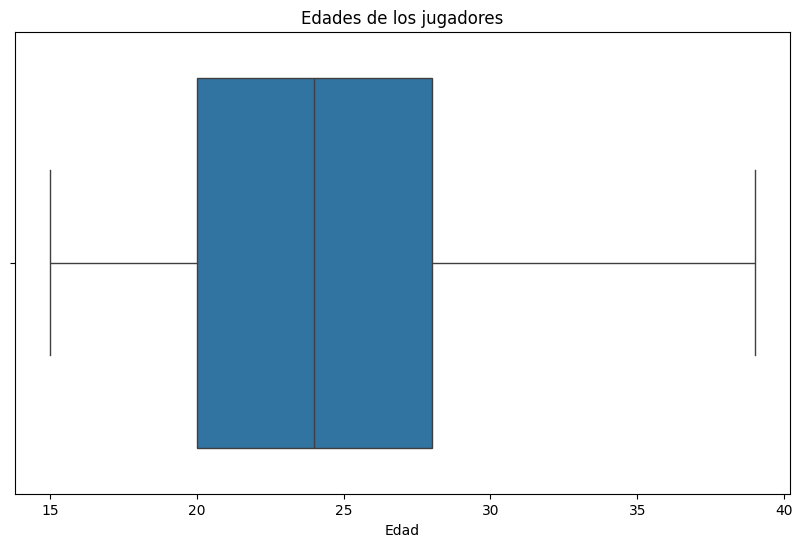

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Age'])
plt.title('Edades de los jugadores')
plt.xlabel('Edad')

**Hipótesis 4:**
El siguiente analisis nos ayuda a validar la cuarta hipótesis

Como claramente se puede observar en el siguiente grafico de puntos y en la matriz de correlación, existe una correlación total (1) entre la cantidad de partidos que un jugador juega desde el inicio y cuantos de esos partidos completa los 90 minutos de juego

<Axes: xlabel='Starts', ylabel='90s'>

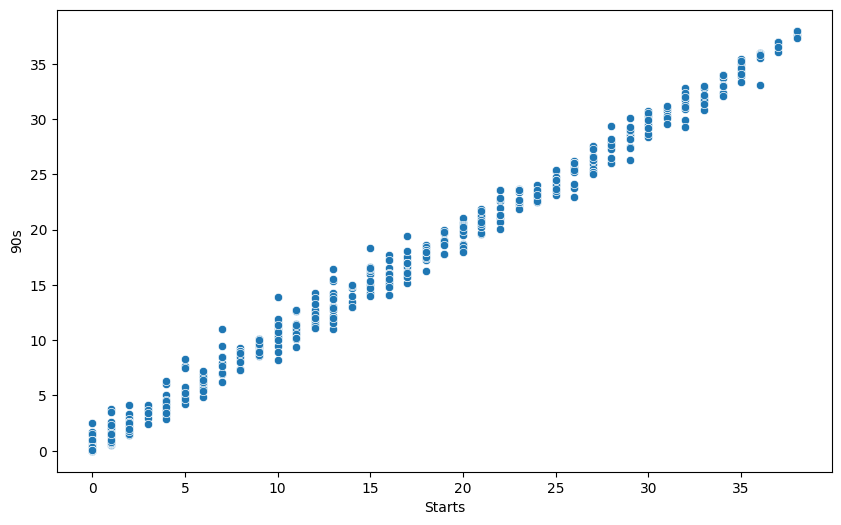

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Starts'], y=df['90s'])
#plt.title('Correlación entre Goles y Asistencias')
#plt.xlabel('Goles')
#plt.ylabel('Asistencias')

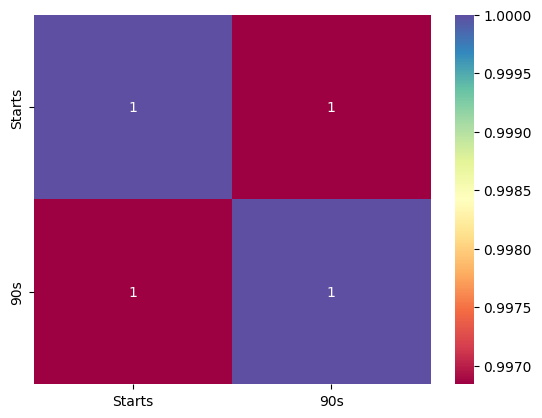

In [23]:
columnas_seleccionadas = df[['Starts', '90s']]
matriz_correlacion = columnas_seleccionadas.corr()

sns.heatmap(matriz_correlacion, cmap='Spectral', annot=True)

plt.show()

**Hipótesis 5:** El siguiente analisis nos ayuda a validar la quinta hipótesis

Lo que se puede observar en el siguiente análisis, utilizando K-Means, se pudo obtener 3 grupos muy marcados por su edad, el cuál parece ser un factor influyente a la hora de observar, la cantidad de partidos jugados, cuantos minutos juegan y su rendimiento adentro de la cancha (goles y asistencias)

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [26]:
jugadores_sin_jugar.head()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
27,Ryan Alebiousu,Arsenal,eng ENG,DF,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Zach Awe,Arsenal,eng ENG,DF,17.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Miguel Azeez,Arsenal,eng ENG,MF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Héctor Bellerín,Arsenal,es ESP,"DF,MF",26.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Mika Biereth,Arsenal,dk DEN,FW,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
columnas_a_reemplazar = ["Min","90s","Gls","Ast"]
df[columnas_a_reemplazar] = df[columnas_a_reemplazar].fillna(0)

In [29]:
df.tail()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,James Storer,Wolverhampton Wanderers,NaN,GK,NaN,0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.drop(columns=['G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1','G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA', 'npxG+xA', 'xG.1','xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1'], inplace=True)

In [62]:
df.head()

,Age,MP,Starts,Min,90s,Gls,Ast
0,19.0,38,36,2978.0,33.1,11.0,7.0
1,23.0,35,35,3063.0,34.0,5.0,0.0
2,23.0,34,34,3060.0,34.0,0.0,0.0
3,23.0,32,32,2880.0,32.0,0.0,0.0
4,22.0,36,32,2785.0,30.9,7.0,4.0


In [63]:
df_k_means = df

In [ ]:
df_k_means.drop(columns=['Player','Team','Nation','Pos'], inplace=True)

In [ ]:
df_k_means['Min'] = df_k_means['Min'].str.replace(',', '').astype(float)

In [66]:
df_k_means = df_k_means['Age'].fillna(24)

In [68]:
X = df_k_means.values.reshape(-1, 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

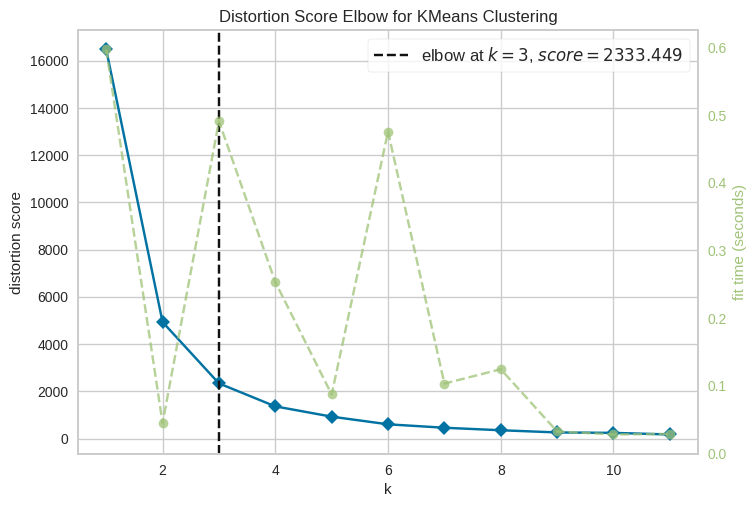

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X)
visualizer.show()

In [52]:
df_k_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     687 non-null    float64
 1   MP      691 non-null    int64  
 2   Starts  691 non-null    int64  
 3   Min     691 non-null    object 
 4   90s     691 non-null    float64
 5   Gls     691 non-null    float64
 6   Ast     691 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 37.9+ KB


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

modelo= Pipeline([('scaler', StandardScaler()),

                  ('model',KMeans(n_clusters=3, max_iter=1000, init='random', random_state=42))
])

modelo.fit_predict(X)
preds = modelo.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
preds

array([0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2,
       2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2,

In [74]:
modelo

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KMeans(init='random', max_iter=1000, n_clusters=3,
                        random_state=42))])

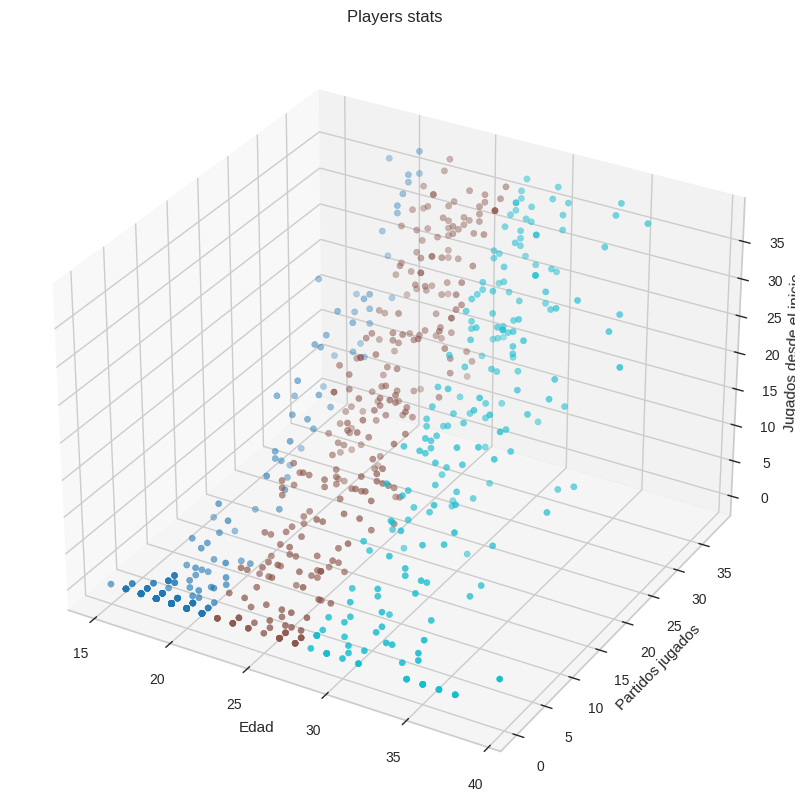

In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection="3d")
ax.scatter3D(df["Age"], df["MP"], df["Starts"], c=preds, cmap="tab10")
plt.title("Players stats")
ax.set_xlabel("Edad")
ax.set_ylabel("Partidos jugados")
ax.set_zlabel("Jugados desde el inicio")
plt.show()

**Hipótesis 6:** El siguiente analisis nos ayuda a validar la sexta hipótesis

El siguiente estudio, nos ayuda a comprender el monto de jugadores que tienen la mayor cantidad de minutos jugados y la mayor cantidad de goles anotados. Utilizando un modelo de clásificación y por medio de un Random Forest Classifier podemos determinar cuantos son

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [138]:
file_path = '/content/Football Players Stats (Premier League 2021-2022).csv'
df = pd.read_csv(file_path, encoding='latin-1')

df

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df.drop(columns=['G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1','G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA', 'npxG+xA', 'xG.1','xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1'], inplace=True)

In [140]:
df['Min'] = df['Min'].str.replace(',', '').astype(float)

In [141]:
df['Age'].fillna(24, inplace=True)


In [143]:
columnas_a_reemplazar = ["Min","90s","Gls","Ast"]
df[columnas_a_reemplazar] = df[columnas_a_reemplazar].fillna(0)

In [183]:
df['Maximos_Min'] = (df['Min'] == df['Min'].max()).astype(int)
df['Maximos_Gls'] = (df['Gls'] == df['Gls'].max()).astype(int)

In [185]:
features = ['Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast']
target = 'Maximos_Min'

In [146]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [147]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
y_pred = model.predict(X_test)

In [149]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



In [151]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

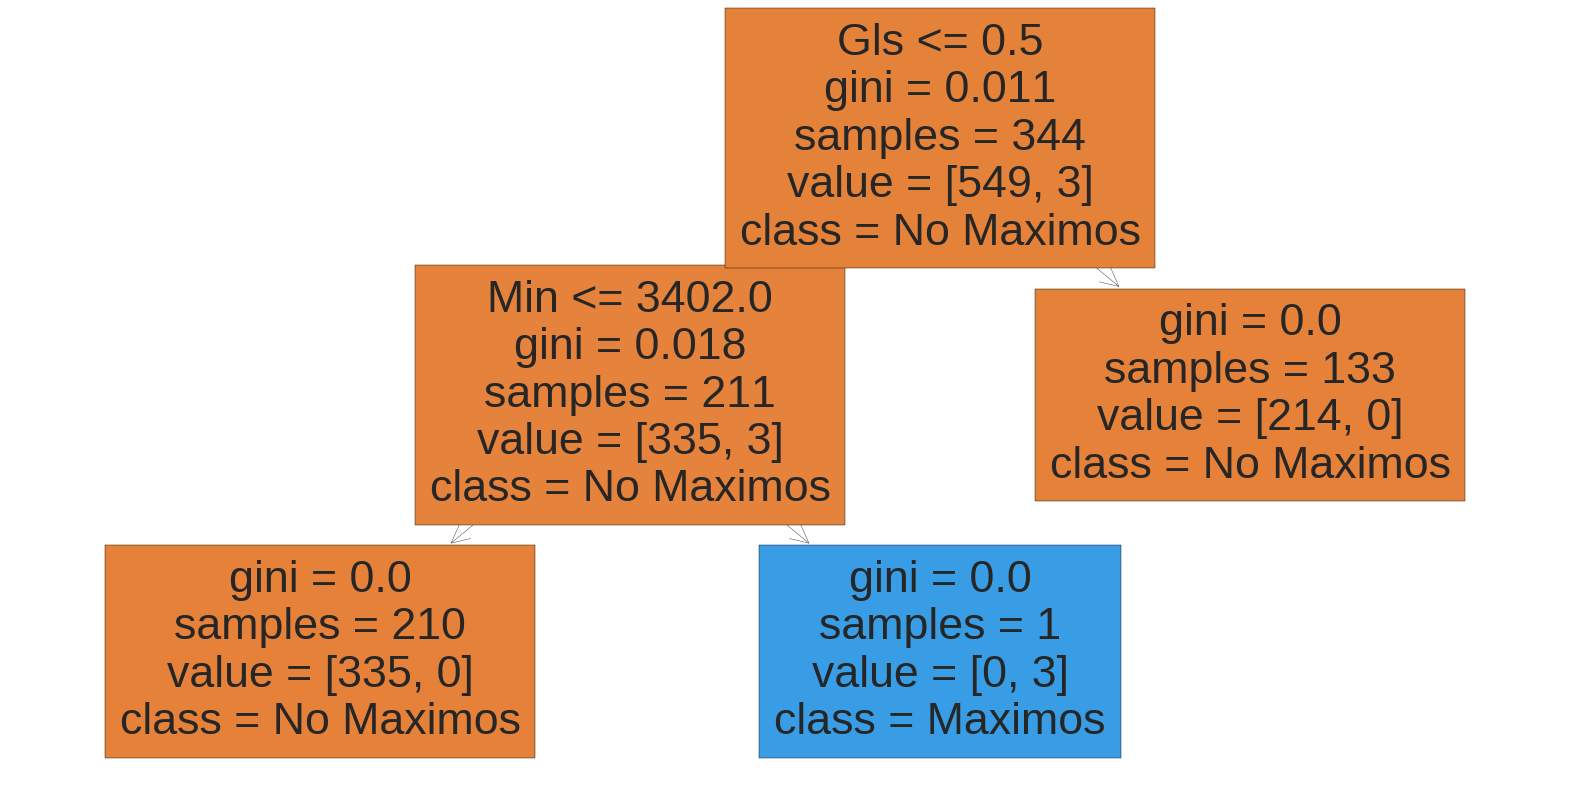

In [158]:
estimator = model.estimators_[3]

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=features, class_names=['No Maximos', 'Maximos'], filled=True)
plt.show()

In [202]:
target = 'Maximos_Gls'

In [203]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [204]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
y_pred = model.predict(X_test)

In [206]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9928057553956835
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       0.00      0.00      0.00         1

    accuracy                           0.99       139
   macro avg       0.50      0.50      0.50       139
weighted avg       0.99      0.99      0.99       139



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


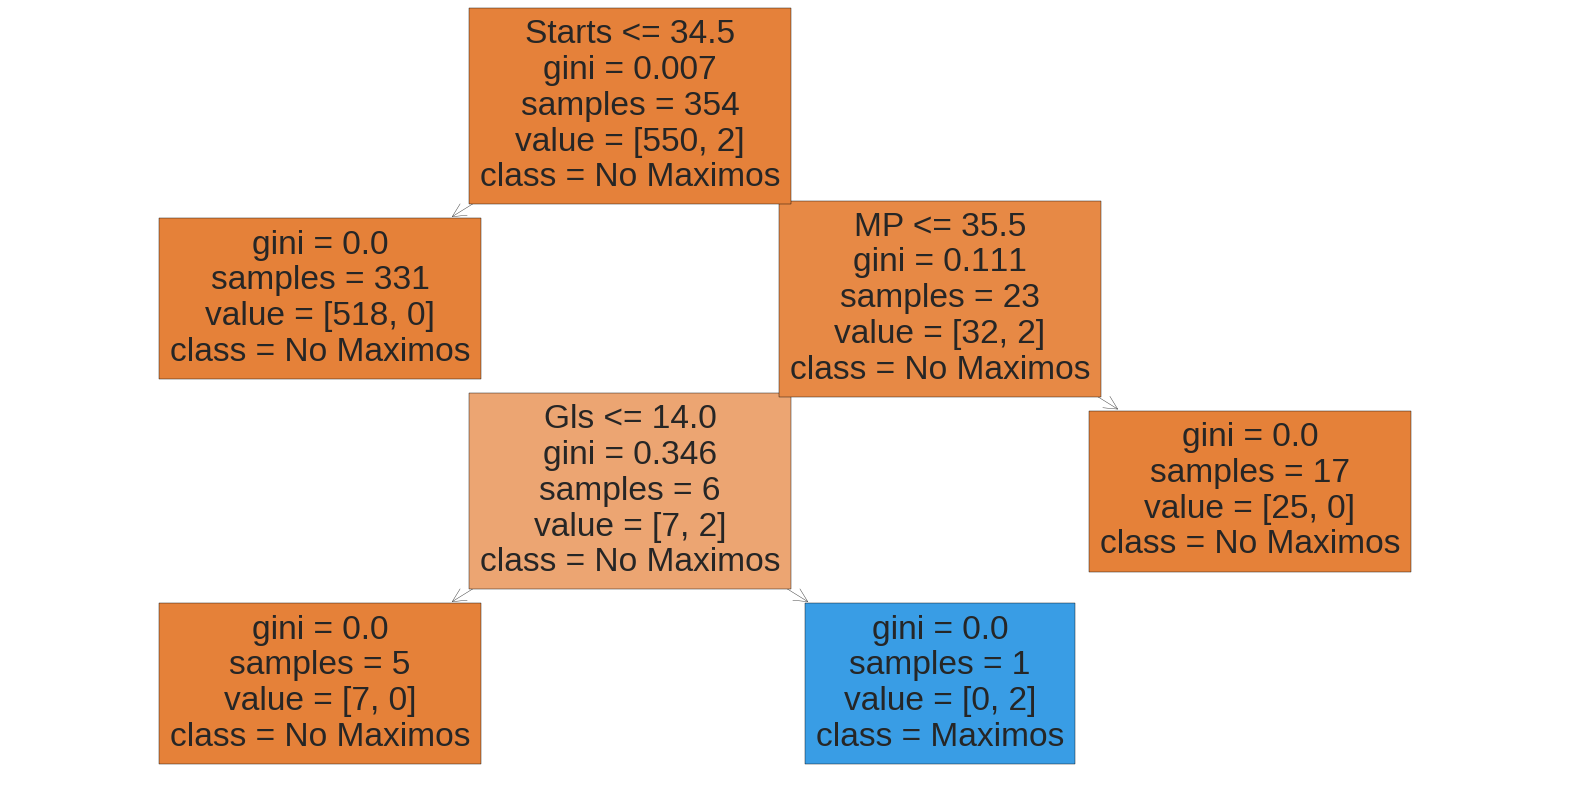

In [208]:
estimator = model.estimators_[5]

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=features, class_names=['No Maximos', 'Maximos'], filled=True)
plt.show()

# Conclusión
Los jugadores que pertenecen al big six, son jugadores que presentan un mayor rendimiento en cuanto a goles, asistencias y minutos jugados. Sin embargo, hay 3 equipos que sobresalen por las figuras que tienen:


1.   Manchester City
2.   Liverpool
1.   Chelsea

También se puede observar que son relativamente pocos aquellos jugadores que jugaron la mayoría o todos los minutos que se pueden jugar, y fueron los mayores anotadores de la competencia:



1.   Maximos min: 3 jugadores
2.   Maximos goleadores: 2 jugadores




